In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Datasets/raw_sales.csv',
                 index_col=["datesold"])
df.head()

,postcode,price,propertyType,bedrooms
datesold,,,,
2007-02-07 00:00:00,2607,525000,house,4
2007-02-27 00:00:00,2906,290000,house,3
2007-03-07 00:00:00,2905,328000,house,3
2007-03-09 00:00:00,2905,380000,house,4
2007-03-21 00:00:00,2906,310000,house,3


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29580 entries, 2007-02-07 00:00:00 to 2019-07-26 00:00:00
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   postcode      29580 non-null  int64 
 1   price         29580 non-null  int64 
 2   propertyType  29580 non-null  object
 3   bedrooms      29580 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.1+ MB


In [ ]:
# How many samples do we have?
len(df)

29580

In [ ]:
# Only want price for each day
house_prices = pd.DataFrame(df["price"]).rename(columns={"price": "Price"})
house_prices.head()


,Price
datesold,
2007-02-07 00:00:00,525000
2007-02-27 00:00:00,290000
2007-03-07 00:00:00,328000
2007-03-09 00:00:00,380000
2007-03-21 00:00:00,310000


In [ ]:
house_prices.tail()

,Price
datesold,
2019-07-25 00:00:00,500000
2019-07-25 00:00:00,560000
2019-07-26 00:00:00,464950
2019-07-26 00:00:00,589000
2019-07-26 00:00:00,775000


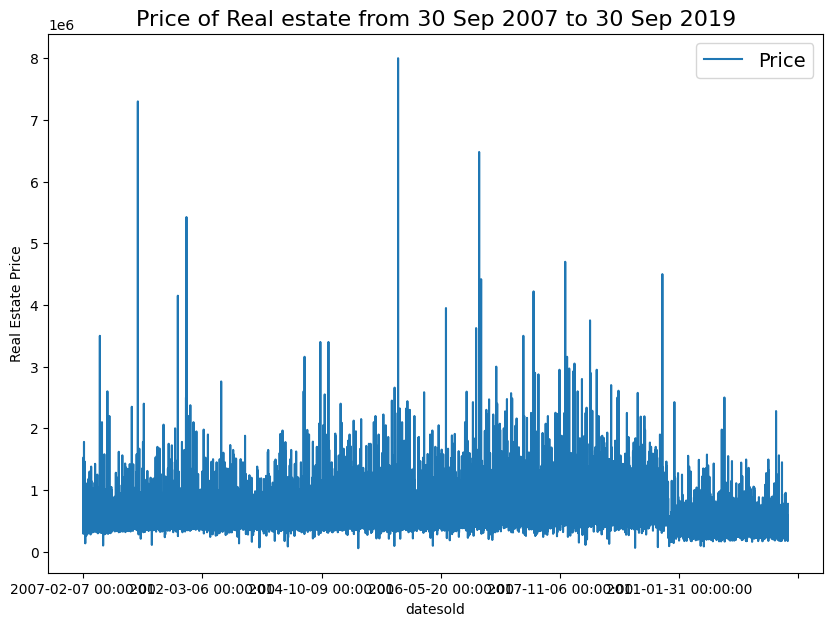

In [ ]:
import matplotlib.pyplot as plt
house_prices.plot(figsize=(10, 7))
plt.ylabel("Real Estate Price")
plt.title("Price of Real estate from 30 Sep 2007 to 30 Sep 2019", fontsize=16)
plt.legend(fontsize=14);

In [ ]:

timesteps = house_prices.index.to_numpy()
prices = house_prices["Price"].to_numpy()

timesteps[:10], prices[:10]

(array(['2007-02-07 00:00:00', '2007-02-27 00:00:00',
        '2007-03-07 00:00:00', '2007-03-09 00:00:00',
        '2007-03-21 00:00:00', '2007-04-04 00:00:00',
        '2007-04-24 00:00:00', '2007-04-30 00:00:00',
        '2007-05-24 00:00:00', '2007-05-25 00:00:00'], dtype=object),
 array([ 525000,  290000,  328000,  380000,  310000,  465000,  399000,
        1530000,  359000,  320000]))

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(timesteps, # dates
                                                    prices, # prices
                                                    test_size=0.2,
                                                    random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((23664,), (5916,), (23664,), (5916,))

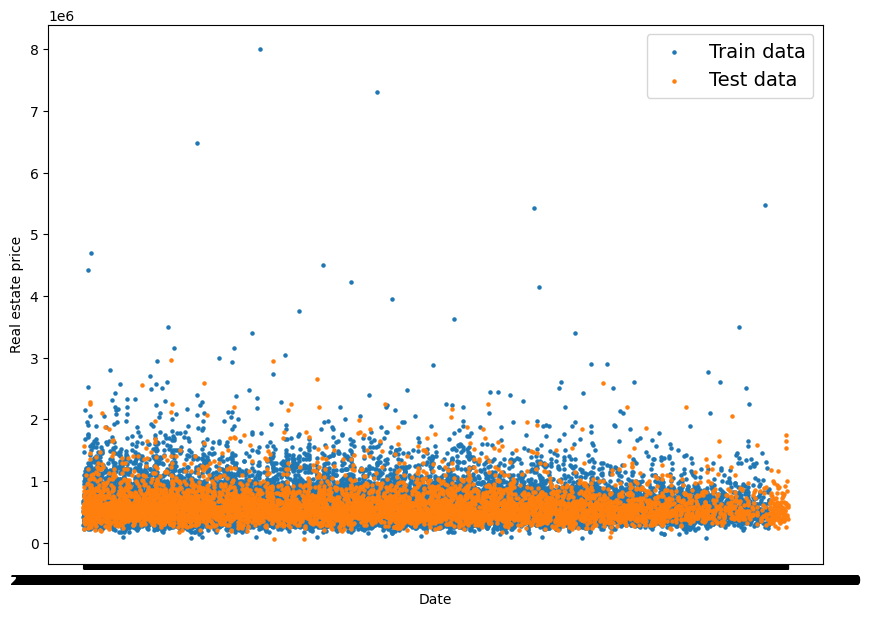

In [ ]:
# Let's plot wrong train and test splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("Real estate price")
plt.legend(fontsize=14)
plt.show();

In [ ]:
# Create train and test splits the right way for time series data
split_size = int(0.8 * len(prices)) # 80% train, 20% test

# Create train data splits (everything before the split)
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Create test data splits (everything after the split)
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(23664, 5916, 23664, 5916)

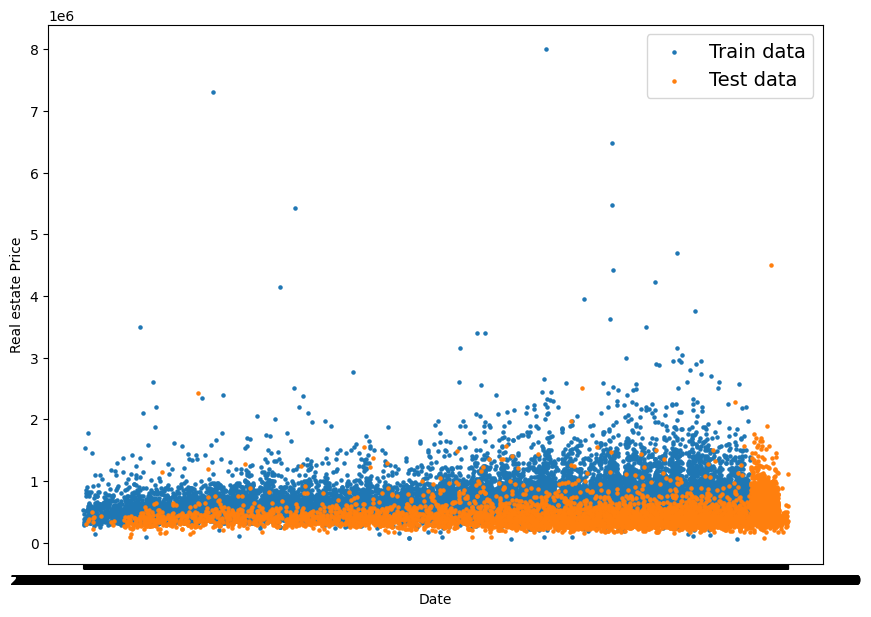

In [ ]:
# Plot correctly made splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("Real estate Price")
plt.legend(fontsize=14)
plt.show();

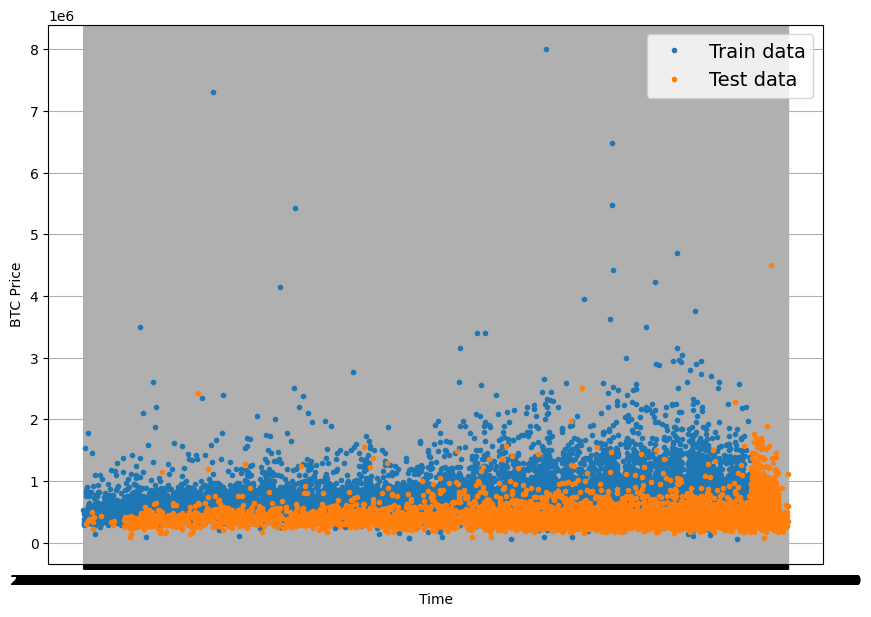

In [ ]:



# Create a function to plot time series data
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  """
  Plots a timesteps (a series of points in time) against values (a series of values across timesteps).

  Parameters
  ---------
  timesteps : array of timesteps
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (setting a value will index from end of timesteps & values)
  label : label to show on plot of values
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)


# Try out our plotting function
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")



In [ ]:

# Create a naïve forecast
naive_forecast = y_test[:-1] # Naïve forecast equals every value excluding the last value
naive_forecast[:10], naive_forecast[-10:] # View frist 10 and last 10

(array([ 940000, 1190000,  460000,  600000,  600000,  687000,  800000,
         490000,  550000,  585000]),
 array([590000, 172500, 297500, 321000, 380000, 475000, 500000, 560000,
        464950, 589000]))

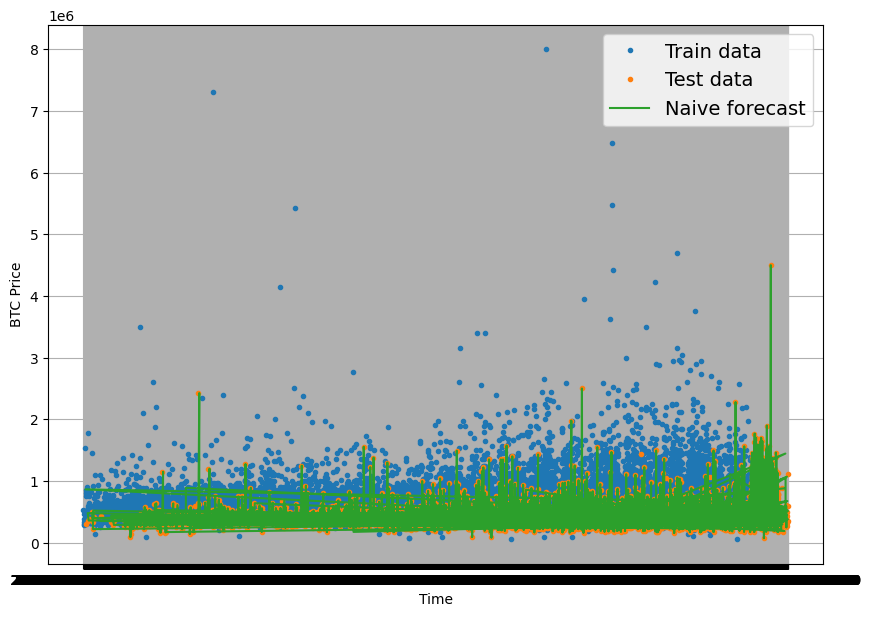

In [ ]:

# Plot naive forecast
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", label="Naive forecast");
